In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [17]:
d = pd.read_csv("/content/gld_price_data.csv")
d.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [18]:
d.shape

(2290, 6)

In [19]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [20]:
d.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [21]:
d.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [22]:
d['Date'] = pd.to_datetime(d['Date'])

<Axes: >

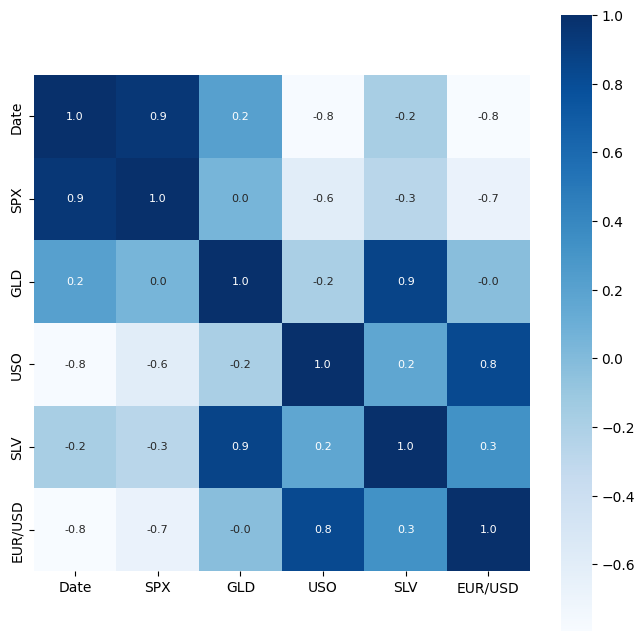

In [23]:
correlation = d.corr()
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size': 8}, cmap = 'Blues')


In [24]:
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-25-b4001fe1288f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

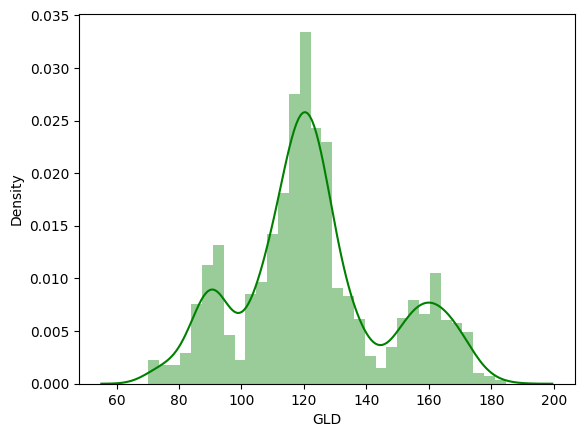

In [25]:
sns.distplot(d['GLD'],color='green')

In [26]:
X = d.drop(['Date', 'GLD'], axis = 1)
y = d['GLD']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [28]:
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [29]:
test_data_pred = regressor.predict(X_test)
print(test_data_pred)

[168.78089955  81.76279992 116.14569973 127.68530071 120.75510109
 154.85219754 150.3414985  126.24380028 117.53429888 126.10660048
 116.4191011  171.50610076 141.51339893 167.75189873 115.16379994
 117.41240047 139.51930206 170.29320074 160.11730295 159.26289926
 155.06139977 124.87900012 175.33279935 157.01310349 125.09800036
  93.9540999   77.18140046 120.58800007 119.03119888 167.45069989
  88.08540034 125.18159975  91.06580057 117.87170045 121.12869926
 136.34020086 115.512301   114.73370096 146.56719986 107.26610079
 104.13930243  87.13099775 126.52250035 117.90579964 152.44319904
 119.51910034 108.53349954 108.16829848  93.25870057 127.0552981
  74.72400033 113.69969888 121.25430003 111.37669886 118.88119915
 121.07739959 159.16329952 168.47520125 146.81629652  86.14379874
  94.12080048  86.83609868  90.30550024 118.81130074 126.38500043
 127.47769991 170.03269983 122.26059939 117.36109881  98.69630031
 168.18430178 142.83779946 131.97860301 121.14780189 121.20949912
 119.769200

In [31]:
error_score = metrics.r2_score(y_test, test_data_pred)
print("R squared error : ", error_score)

R squared error :  0.9894208804656589


In [33]:
y_test = list(y_test)

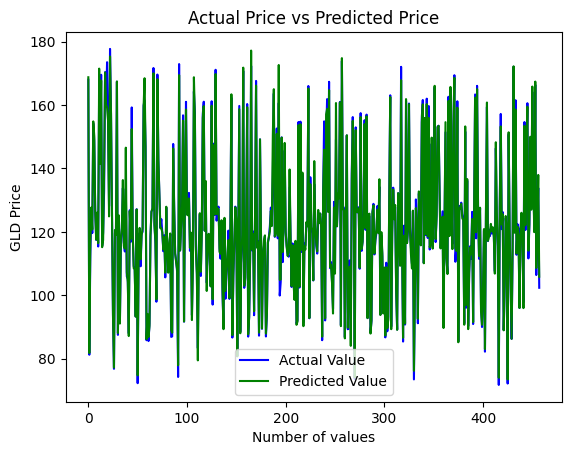

In [34]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()